# 040 Processing Data with Pandas

> COM6018

*Copyright &copy; 2023 Jon Barker, University of Sheffield. All rights reserved*.

## 1. Introduction

### 1.1 What is Pandas?

So far in this module we have seen how data can be processed very flexibly using native Python code and Python dictionary and list data structures. However, this flexibility comes at a cost: processing data in this way can be slow and is not suitable for large datasets. We have also seen how using NumPy arrays allows us to process numeric data very efficiently. NumPy is excellent for mathematical computation, linear algebra and a lot of the matrix/vector calculations that occur in machine learning. However, it is not so good for processing more complex structured data which might have a mixture of data types (e.g., numeric, string, categorical, etc.) and missing values, etc. This is where **Pandas** comes in.

**Pandas** is an open source 3rd party library designed for the needs of data scientists. It was originally built on top of NumPy which allows it to be very fast, but it offers a lot of functionality for processing structured data that is not available in NumPy.

Although Pandas was originally built around NumPy, NumPy was not itself designed for this purpose and that has led to some inefficiencies. However, Pandas has recently had a major new release (Pandas 2.0) which now allows the NumPy 'backend' to be replaced with one built around [Apache Arrow](https://arrow.apache.org/) -- a framework that has been designed from the ground-up for efficient processing of large table-like datasets.

This tutorial is based on Pandas 2.0. Full documentation can be found at [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/).

### 1.2 Installing Pandas

As Pandas is not part of the Python standard library, it must first be installed before it can be used. This can be done easily using the `conda` package manager. (If you are using the Anaconda distribution of Python, then Pandas will already be installed. Or if you have built a conda environment using the `com6018.environment.yml` file provided with the module, then Pandas will also already be installed.)

If Pandas is not installed, then you can install it by typing the following command in your terminal,

```txt
conda install -c conda-forge pandas
```

This will install the latest version of Pandas.

To use Pandas in your Python code you simply need to import it at the start of your program, e.g.,

In [2]:
import pandas as pd

Conventional Python practice is to import Pandas using the alias `pd`. This is not essential, but it is recommended. Following conventions will make your code easier to read for other Python programmers.

### 1.3 Basic Pandas Concepts

Pandas is designed for processing structured data much like the data that would be stored in a spreadsheet or a csv file. Pandas organises data using two basic data structures: the **Series** and the **DataFrame**. A **Series** is a one-dimensional array of data which can be thought of as a single column in a spreadsheet. A **DataFrame** represents a table of data, which is represented as a collection of **Series** objects. A **DataFrame** can be thought of as being similar to an entire spreadsheet.

Pandas has its own **type system** for representing data which is the same as that for NumPy but with a few extensions for representing things like dates and intervals. Every Series (i.e., spreadsheet column) will have its own type but there can be a different type for each Series.

Pandas offers a lot of functionality for processing data. This includes: operations such as filtering tables, joining tables, grouping data, etc. It also includes a lot of functionality for reading and writing data in different formats such as CSV, Excel, JSON, SQL, etc. It also has some functionality for visualising data which is typically easier to use than the equivalent functionality in `Matplotlib`.

## 2. Reading Data

Pandas has a range of methods for reading data from different standard data formats. For example, it can read Excel spreadsheets directly with a simple `read_excel()` method. However, continuing from our previous tutorials, we will focus on the commonly used CSV and JSON formats.

### 2.1 Reading CSV Data

Reading a CSV file with Pandas can be done with a single line of code:

In [3]:
import pandas as pd

df = pd.read_csv('data/windfarm.csv')

The `read_csv` function will parse the file and return the results as a Pandas DataFrame object. (It is common to use the variable name `df` for a DataFrame object in simple code examples. You may want to give the DataFrame a more descriptive name when writing more complex code.)

We can now print the resulting DataFrame object to see what it contains:

In [4]:
print(df)

       id   "turbines"   "height"   "power"
0  WF1355           13         53   19500.0
1  WF1364            3         60    8250.0
2  WF1356           12         60   24000.0
3  WF1357           36         60   72000.0


This will produce output looking like the following,

```text
       id   "turbines"   "height"   "power"
0  WF1355           13         53     19500.0
1  WF1364            3         60      8250.0
2  WF1356           12         60     24000.0
3  WF1357           36         60     72000.0
```

Note, the `read_csv` function has read the names of the fields from the first line of the csv file and used these to name the DataFrame columns. If our csv file did not have column names in the first line, then we would need to specify them using the `names` parameter, e.g.,

In [5]:
df = pd.read_csv('data/windfarm.no_names.csv', names=['id', 'turbines', 'height', 'power'])
print(df)

       id  turbines  height    power
0  WF1355        13      53  19500.0
1  WF1364         3      60   8250.0
2  WF1356        12      60  24000.0
3  WF1357        36      60  72000.0


Note also how Pandas has added an extra column without a title to the left of the data. This is known as the **index column**. The index column is used to uniquely identify each row in the DataFrame. Pandas has generated this index for us by giving the rows consecutive integer index values starting from 0. If we want to use a different column as the index, then we can specify this using the `index_col` parameter, e.g.,

In [6]:
df_id = pd.read_csv('data/windfarm.csv', index_col='id')
print(df_id)

         "turbines"   "height"   "power"
id                                      
WF1355           13         53   19500.0
WF1364            3         60    8250.0
WF1356           12         60   24000.0
WF1357           36         60   72000.0


This will produce output looking like the following,

```text
         "turbines"   "height"   "power"
id
WF1355           13         53   19500.0
WF1364            3         60    8250.0
WF1356           12         60   24000.0
WF1357           36         60   72000.0
```

```{tip}
You typically want the values in the index column to be unique. If they are not unique, then Pandas will still allow you to use the column as the index, but it will not be able to use some of the more advanced functionality that it offers for indexing. It you are not sure about which column to use as the index, then it is often best not to specify one and to just allow Pandas to create its own index column.
```

### 2.2 Reading JSON Data

Reading JSON data is just as easy as reading CSV data. We can read the climate JSON data from our previous tutorial with a single line of code:

In [7]:
import pandas as pd

df = pd.read_json('data/climate.json')

We can now print the resulting DataFrame object to see what it contains:

In [8]:
print(df)

      id            city        country  \
0      1       Amsterdam    Netherlands   
1      2          Athens         Greece   
2      3      Atlanta GA  United States   
3      4        Auckland    New Zealand   
4      5       Austin TX  United States   
..   ...             ...            ...   
100  101  Albuquerque NM  United States   
101  102      Vermont IL  United States   
102  103    Nashville TE  United States   
103  104    St. Louis MO  United States   
104  105  Minneapolis MN  United States   

                                            monthlyAvg  
0    [{'high': 7, 'low': 3, 'dryDays': 19, 'snowDay...  
1    [{'high': 12, 'low': 7, 'dryDays': 21, 'snowDa...  
2    [{'high': 12, 'low': 2, 'dryDays': 18, 'snowDa...  
3    [{'high': 23, 'low': 16, 'dryDays': 24, 'snowD...  
4    [{'high': 18, 'low': 6, 'dryDays': 15, 'snowDa...  
..                                                 ...  
100  [{'high': 10, 'low': -4, 'dryDays': 24, 'snowD...  
101  [{'high': 3, 'low': -8

Note, the `monthlyAvg` data which was a list of dictionaries in the JSON file is now appearing in a single column of the DataFrame. This is not a very convenient format for processing the data. We can use a method called `apply()` to convert this column into a DataFrame with one column per each dictionary in the list. Using `apply()` a second time can then expand the dictionaries into columns.

In [11]:
df_monthly = df['monthlyAvg'].apply(pd.Series)
print(df_monthly[0].apply(pd.Series))

     high   low  dryDays  snowDays  rainfall
0     7.0   3.0     19.0       4.0      68.0
1    12.0   7.0     21.0       1.0      53.0
2    12.0   2.0     18.0       2.0      99.5
3    23.0  16.0     24.0       0.0      25.6
4    18.0   6.0     15.0       1.0      67.8
..    ...   ...      ...       ...       ...
100  10.0  -4.0     24.0       4.0      10.7
101   3.0  -8.0     18.0      11.0      52.1
102   9.0  -1.0     18.0       8.0      84.4
103   7.0  -4.0     16.0      10.0      69.8
104  -3.0 -13.0     20.0      16.0      19.9

[105 rows x 5 columns]


This is a little complicated but it is typical of the preprocessing steps we might need to take if working with JSON files that have a complex nested structure. Fortunately, the majority of the data we will be working with will be in CSV format or in a simple JSON format with a flat structure.

## 3. The DataFrame Object

We will now look in a bit more detail at the DataFrame object. For this section we will be using a dataset that records the extent of sea ice in the Arctic and Antarctic. This data is available from the [National Snow and Ice Data Center](https://nsidc.org/data/g02135). The data is available in CSV format and we have already downloaded it and saved it in the `data` directory as `seaice.csv`.

We will read the data and print the DataFrame,

In [12]:
import pandas as pd

df = pd.read_csv('data/seaice.csv')

In [13]:
print(df)

       Year   Month   Day       Extent      Missing  \
0      1978      10    26       10.231          0.0   
1      1978      10    28       10.420          0.0   
2      1978      10    30       10.557          0.0   
3      1978      11     1       10.670          0.0   
4      1978      11     3       10.777          0.0   
...     ...     ...   ...          ...          ...   
26349  2019       5    27       10.085          0.0   
26350  2019       5    28       10.078          0.0   
26351  2019       5    29       10.219          0.0   
26352  2019       5    30       10.363          0.0   
26353  2019       5    31       10.436          0.0   

                                             Source Data hemisphere  
0       ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
1       ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
2       ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
3       ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...   

Note, when printing a DataFrame, Pandas will only show the first and last few rows and columns. We can see from the output that the DataFrame has 26354 rows and measurements that date back to 1978. But we can't see the full set of columns.

To get a list of all the columns in the DataFrame we can use the `columns` attribute,

In [14]:
print(df.columns)

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data',
       'hemisphere'],
      dtype='object')


This will produce output looking like the following,

```text
Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data',
       'hemisphere'],
      dtype='object')
```

We can now see that the data is composed of seven columns: year, month, day, extent, missing, source data, and hemisphere. The extent and missing columns record the extent of the sea ice and the number of missing measurements for each day. The source data column records the source of the data. The hemisphere column records whether the data is for the Arctic or Antarctic.

Note that space characters have become incorporated into the column names. This is because the columns in the CSV file had spaces after the commas. We can easily skip these spaces by adding the `skipinitialspace=True` parameter to the `read_csv()` method,

In [15]:
import pandas as pd

df = pd.read_csv('data/seaice.csv', sep=',', skipinitialspace=True)

In [16]:
print(df.columns)

Index(['Year', 'Month', 'Day', 'Extent', 'Missing', 'Source Data',
       'hemisphere'],
      dtype='object')


### 3.1 Selecting a Column

We can select a single column from the DataFrame using the column name as an index,

In [17]:
extent = df['Extent']
print(extent)

0        10.231
1        10.420
2        10.557
3        10.670
4        10.777
          ...  
26349    10.085
26350    10.078
26351    10.219
26352    10.363
26353    10.436
Name: Extent, Length: 26354, dtype: float64


This will produce output looking like the following,

```text
0        10.231
1        10.420
2        10.557
3        10.670
4        10.777
          ...
26349    10.085
26350    10.078
26351    10.219
26352    10.363
26353    10.436
Name: Extent, Length: 26354, dtype: float64
```

Notice how this looks a bit different from when we printed the DataFrame. This is because the column is not a DataFrame, it is a Series. Remember, Pandas uses the Series object for storing individual columns of data. We can check this by printing the type of the column,

In [18]:
print(type(df))  # This will print <class 'pandas.core.frame.DataFrame'>
extent = df['Extent']
print(type(extent)) # This will print <class 'pandas.core.series.Series'>

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


The Series object has a specific type (called its `dtype`). In this case the type is `float64` which means that the data is stored as 64-bit floating point numbers. We can check the type of the data in a Series using the `dtype` attribute. Or more conveniently we can retrieve the data type of all the columns in the DataFrame using the DataFrame's `dtypes` attribute. Let's do that now,

In [19]:
print(df.dtypes)

Year             int64
Month            int64
Day              int64
Extent         float64
Missing        float64
Source Data     object
hemisphere      object
dtype: object


This will produce output looking like the following,

```text
Year             int64
Month            int64
Day              int64
Extent         float64
Missing        float64
Source Data     object
hemisphere      object
dtype: object
```

We can see that the Year, Month and Day have integer values; the Extent and Missing columns have floating point values; and the Source Data and hemisphere columns have 'object' values.

Pandas has inferred these types from the content of the csv file. It usually guesses correctly but it can sometimes get it wrong. If it is unsure it will typically default to the 'object' type. This has happened for the Source Data and hemisphere columns which should be strings. We can fix this by explicitly converting these columns to strings using the `astype()` method,

In [20]:
df['Source Data'] = df['Source Data'].astype("string")
df['hemisphere'] = df['hemisphere'].astype("string")
print(df.dtypes)

Year                    int64
Month                   int64
Day                     int64
Extent                float64
Missing               float64
Source Data    string[python]
hemisphere     string[python]
dtype: object


A Series object is much like a list and we can use indexes and slicing operators to reference elements in the Series. For example, we can get the first element in the Series using,

In [21]:
extent = df['Extent']
print(extent[0])  # print the first element

10.231


or we can retrieve the sequence of elements from the 6th to 10th with,

In [22]:
extent = df['Extent']
print(extent[5:10]) # print a subseries from index 5 to 9

5    10.968
6    11.080
7    11.189
8    11.314
9    11.460
Name: Extent, dtype: float64


(Remember, the first element of a series has index 0, so the 10th element has index 9. The slicing notation `a:b` means to go from index `a` to `b-1` inclusive.)

### 3.2 Selecting a Row

We can select a single *row* from the DataFrame using the `iloc` attribute. This attribute takes a single integer index and returns a Series containing the data from the row at that index. For example, to select the first row we can use,

In [23]:
row = df.iloc[0]

In [24]:
print(row)

Year                                                        1978
Month                                                         10
Day                                                           26
Extent                                                    10.231
Missing                                                      0.0
Source Data    ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...
hemisphere                                                 north
Name: 0, dtype: object


Notice how the results have been returned as a Series object. We can check this by printing the type of the row,

In [25]:
print(type(row)) # This will print <class 'pandas.core.series.Series'>

<class 'pandas.core.series.Series'>


So DataFrames are a collection of Series objects representing the columns, but if we extract a single row we get a Series object representing the row. The dtype of the row series is 'object'. An object type can basically store anything so it is being used here because each element in the row series has a different type.

Alternatively, we can extract a range of rows using slicing,

In [26]:
rows = df.iloc[0:5]

In [27]:
print(rows)

   Year  Month  Day  Extent  Missing  \
0  1978     10   26  10.231      0.0   
1  1978     10   28  10.420      0.0   
2  1978     10   30  10.557      0.0   
3  1978     11    1  10.670      0.0   
4  1978     11    3  10.777      0.0   

                                         Source Data hemisphere  
0  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
1  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
2  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
3  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  
4  ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...      north  


Note that a collection of rows is still a DataFrame. We can check this by printing the type of the variable `rows`,

In [28]:
print(type(rows))

<class 'pandas.core.frame.DataFrame'>


Basically, if we have a single row or column then we are dealing with a Series, but if we have multiple rows and columns then we are dealing with a DataFrame.

### 3.3 Filtering a DataFrame

Very often in data science we need to select some subset of our data based on some condition, e.g., all cities where the population is greater than 1 million, or all years where the average temperature was less than 15 degrees Celcius. Or, more simply, we may wish to select every row that has an even index value. Alternatively, we may want to remove various columns from the DataFrame, i.e., those representing fields that we are not interested in. We will refer to these operations that take a DataFrame and return another smaller DataFrame as **filtering** operations. In this section we will look at a few simple examples.

#### 3.3.1 Removing or Selecting Columns

After loading our data we may want to remove columns that we are not interested in. This is easily done using the `drop()` method. For example, to make it easier to print the data frame, we will remove the Source Data column using,

In [29]:
df = df.drop(columns=['Source Data'])

There are now only 6 columns in the DataFrame and they can all be viewed at once,

In [30]:
print(df)

       Year  Month  Day  Extent  Missing hemisphere
0      1978     10   26  10.231      0.0      north
1      1978     10   28  10.420      0.0      north
2      1978     10   30  10.557      0.0      north
3      1978     11    1  10.670      0.0      north
4      1978     11    3  10.777      0.0      north
...     ...    ...  ...     ...      ...        ...
26349  2019      5   27  10.085      0.0      south
26350  2019      5   28  10.078      0.0      south
26351  2019      5   29  10.219      0.0      south
26352  2019      5   30  10.363      0.0      south
26353  2019      5   31  10.436      0.0      south

[26354 rows x 6 columns]


Rather than removing columns, an alternative is to actively select the subset of columns that we wish to keep. This is done with the following indexing notation,

In [31]:
df = df[['Year', 'Month', 'Day', 'Extent', 'Missing', 'hemisphere']]

#### 3.3.2 Selecting Rows

Very often when analysing data we want to select a subset of the samples entries that match some criterion, i.e., to select a subset of the rows in our DataFrame.  This is very straightforward in Pandas and is done using a boolean expression as the index value.

For example, lets say we want to select all the rows where the sea ice extent value is less than 5.0. We can do this using,

In [32]:
selector = df['Extent'] < 5.0
df_low_extent = df[selector]

We have done this in two steps. The first line takes the Extent series and compares every value to 5.0. This produces a series of boolean (i.e, True or False) values which we have stored in a variable called `selector`. The second line uses this boolean series as an index which has the effect of selecting only the rows where the value is True.

If we now print the resulting DataFrame we can see that it only contains about 3000 rows of the original 26,354 rows in the dataset, i.e., these are the samples where the sea ice extent has fallen below 5.0 billion square kilometers.

In [33]:
print(df_low_extent)

       Year  Month  Day  Extent  Missing hemisphere
8874   2007      8   20   4.997      0.0      north
8875   2007      8   21   4.923      0.0      north
8876   2007      8   22   4.901      0.0      north
8877   2007      8   23   4.872      0.0      north
8878   2007      8   24   4.837      0.0      north
...     ...    ...  ...     ...      ...        ...
26296  2019      4    4   4.564      0.0      south
26297  2019      4    5   4.730      0.0      south
26298  2019      4    6   4.856      0.0      south
26299  2019      4    7   4.902      0.0      south
26300  2019      4    8   4.993      0.0      south

[2988 rows x 6 columns]


They are ordered by year. What do you notice about the earliest year of this data? Remember that the original complete dataset had recordings going back to 1979, but all the monthly recordings where the sea ice extent have fallen below 5.0 billion square kilometers have occurred since 2007. Is this something that might have happened by chance or is it evidence of a trend in the data? We will see how to answer such questions a little later in the module.

Let's say that we now just want to look at the Arctic data. We can do this by selecting only the rows where the hemisphere is 'north'. We can do this using the `eq()` method,

In [34]:
filter = df['hemisphere'].eq('north')

If we wanted to combine these two filters to select only the rows where the sea ice extent is less than 5.0 billion square kilometers and the hemisphere is 'north' we could do this using the `&` operator,

In [35]:
filter = (df['hemisphere'].eq('north')) & (df['Extent'] < 5.0)
df_low_extent_north = df[filter]

In [36]:
print(df_low_extent_north)

       Year  Month  Day  Extent  Missing hemisphere
8874   2007      8   20   4.997      0.0      north
8875   2007      8   21   4.923      0.0      north
8876   2007      8   22   4.901      0.0      north
8877   2007      8   23   4.872      0.0      north
8878   2007      8   24   4.837      0.0      north
...     ...    ...  ...     ...      ...        ...
12932  2018      9   29   4.846      0.0      north
12933  2018      9   30   4.875      0.0      north
12934  2018     10    1   4.947      0.0      north
12935  2018     10    2   4.988      0.0      north
12936  2018     10    3   4.975      0.0      north

[339 rows x 6 columns]


This leave just 339 rows.

```{note}
Be careful to use parentheses around each filter expression above. The `&` operator has a higher precedence than the `<` operator so if you don't use parentheses then it will still be a valid the expression but will not work in the way you expected.
```

Note, that we use a very similar indexing syntax, i.e., `df[selector]`, for selecting both rows and columns. The difference is that when selecting rows we use a boolean series as the index value, whereas when selecting columns we use a list of column names as the index value. This can be a little confusing at first but you will soon get used to it.

## 4 Grouping and averaging values

### 4.1 Operating on columns

There are many operations that we might apply over an entire column to compute some 'statistic' of that column. For example, we might want to compute a columns minimum, maximum, mean, median, standard deviation, etc. The Series object provides many methods to make this easy.

For example, to compute the mean of the Extent column we can use,

In [37]:
mean_value = df['Extent'].mean()
print(mean_value)

11.494986301889654


We can also calculate the minimum and maximum values in a similar way,

In [38]:
print(df['Extent'].min(), df['Extent'].max())

2.08 20.201


For convenience, the DataFrame object provides a `describe()` method that will compute and display the basic statistics for all the columns in the DataFrame that have numerical values. For example,

In [39]:
print(df.describe())

               Year         Month           Day        Extent       Missing
count  26354.000000  26354.000000  26354.000000  26354.000000  26354.000000
mean    2000.591941      6.507399     15.740685     11.494986      0.000003
std       10.896821      3.451938      8.801607      4.611734      0.000227
min     1978.000000      1.000000      1.000000      2.080000      0.000000
25%     1992.000000      4.000000      8.000000      7.601000      0.000000
50%     2001.000000      7.000000     16.000000     12.217000      0.000000
75%     2010.000000     10.000000     23.000000     15.114000      0.000000
max     2019.000000     12.000000     31.000000     20.201000      0.024000


This will print the following table:

```text
               Year         Month           Day        Extent       Missing
count  26354.000000  26354.000000  26354.000000  26354.000000  26354.000000
mean    2000.591941      6.507399     15.740685     11.494986      0.000003
std       10.896821      3.451938      8.801607      4.611734      0.000227
min     1978.000000      1.000000      1.000000      2.080000      0.000000
25%     1992.000000      4.000000      8.000000      7.601000      0.000000
50%     2001.000000      7.000000     16.000000     12.217000      0.000000
75%     2010.000000     10.000000     23.000000     15.114000      0.000000
max     2019.000000     12.000000     31.000000     20.201000      0.024000
```

The table shows the number of items (count), mean, standard deviation (std), minimum (min), maximum (max), and the 25th, 50th, and 75th percentiles of the data in each column. Note, the 50th percentile is the same as the median. These statistics will be more meaningful for some columns than others. For example, in the above the mean and standard deviation of the Month and Day columns are not very meaningful. Nevertheless, the `describe()` methods is very useful for getting a quick overview of the data and is often the first thing we will do when we load a new dataset.

### 4.2 Grouping data

In the above, we have computed statistics of the entire data set. It is more common to want to compute statistics after grouping the data into meaningful subsets. For example, we might be interested in the mean sea ice extent for each year, or for each month, or for the north and south hemispheres, separately. To compute such statistics we need to group the data into subsets and then compute the statistics for each subset.

Grouping the data is done using the `groupby()` method. For example, to group the data by month we can use,

In [40]:
grouped = df.groupby('Month')

This returns a special `DataFrameGroupBy` object. This object is a special type of DataFrame that contains the data grouped by the column we specified. We can then compute statistics on groups by selecting a column and using the same methods that we used earlier. For example, to compute the mean sea ice extent for each month we can use,

In [41]:
print(grouped['Extent'].mean())

Month
1      9.587706
2      9.057401
3      9.621926
4     10.678099
5     11.637163
6     12.476158
7     12.563403
8     12.288473
9     12.265863
10    13.044214
11    13.152069
12    11.514823
Name: Extent, dtype: float64


The code above has produced a mean value for each month of the year (1 is January, 2 is February, etc). Notice how the amount of ice reaches a maximum in November and has a minimum in February. This might seem somewhat surprising to you, e.g., the maximum and minimum are not six months apart, as might be expected. Note, however, that when we grouped by month we included both Northern and Southern hemisphere measurements, so this mean will be the average across both hemispheres and this can lead to an unintuitive outcome.

Let's say that we wanted to look at the sea ice extent for each month but separately for the northern and southern hemisphere. We now want to group by both month and hemisphere. We can do this easily by passing a list of column names to the `groupby()` method,

In [42]:
grouped = df.groupby(['hemisphere', 'Month'])
print(grouped['Extent'].mean())

hemisphere  Month
north       1        14.176006
            2        15.044512
            3        15.205876
            4        14.481141
            5        13.072172
            6        11.516788
            7         9.090173
            8         6.784248
            9         5.988981
            10        7.929377
            11       10.448120
            12       12.638618
south       1         4.999406
            2         3.070290
            3         4.037976
            4         6.875058
            5        10.202155
            6        13.435529
            7        16.036633
            8        17.792698
            9        18.542745
            10       18.159051
            11       15.856019
            12       10.391028
Name: Extent, dtype: float64


Note, that when printing out a DataFrameGroupBy object that has been grouped by multiple fields, Pandas will produce a multicolumn table with the first column being the first field in the groupby list, the second column being the second field in the groupby list, etc. In this case, the first column is the hemisphere and the second column is the month.

We now see that in the Arctic, the sea ice reaches a maximum in March and a minimum in September. In the Antarctic, the sea ice reaches a maximum in September and a minimum in February. This is more in line with what we might expect, i.e., the maxima and minima are about 6 months apart. The dates might seem a little later than what you would consider to be the peak of winter and summer. This is because of the way in which water stores heat. The oceans take a long time to cool down and warm up so the coldest and warmest months are not the same as the months with the shortest and longest days. You can now also see that the Antarctic sea ice extent is much more variable than the Arctic sea ice extent.

Let us now consider how we would examine the Arctic and Antarctic sea ice minimum over the years. We can do this by grouping by hemisphere and year and then selecting the minimum value in each group,

In [43]:
grouped = df.groupby(['hemisphere', 'Year'])
print(grouped['Extent'].min())

hemisphere  Year
north       1978    10.231
            1979     6.895
            1980     7.533
            1981     6.902
            1982     7.160
                     ...  
south       2015     3.544
            2016     2.616
            2017     2.080
            2018     2.150
            2019     2.444
Name: Extent, Length: 84, dtype: float64


Pandas has built-in methods for making plots. Below we are making a plot and then getting the `figure` from the plot and saving it to a file. The resulting plot is being imported back into these notes.

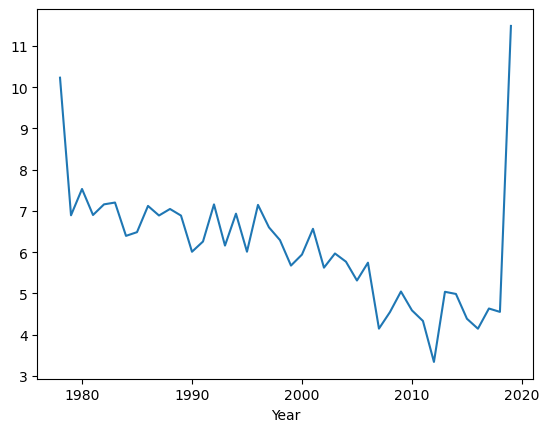

In [45]:
grouped = df.groupby(['hemisphere', 'Year'])
ice_extent = grouped['Extent'].min()['north']

my_plot = ice_extent.plot()
my_plot.get_figure().savefig("figures/040_1.jpeg")

In [49]:
grouped = df.groupby(['hemisphere', 'Year'])
ice_extent = grouped['Extent'].min()['north']
print(ice_extent)

Year
1978    10.231
1979     6.895
1980     7.533
1981     6.902
1982     7.160
1983     7.204
1984     6.396
1985     6.486
1986     7.122
1987     6.890
1988     7.048
1989     6.888
1990     6.011
1991     6.259
1992     7.159
1993     6.161
1994     6.934
1995     6.012
1996     7.147
1997     6.602
1998     6.293
1999     5.676
2000     5.943
2001     6.567
2002     5.625
2003     5.969
2004     5.770
2005     5.314
2006     5.746
2007     4.147
2008     4.548
2009     5.047
2010     4.590
2011     4.333
2012     3.340
2013     5.040
2014     4.988
2015     4.387
2016     4.145
2017     4.635
2018     4.553
2019    11.486
Name: Extent, dtype: float64


You can see that the sea ice extent has been broadly trending downwards but the values at the extremes of the x-axis look a bit odd, i.e., there are very large values for the first and last year in the dataset. This is is an 'artefact' caused because the data for these years is incomplete. The data for 1978 only starts in November and the data for 2019 only goes up to July. The code has computed the average for the few months that are available but this is not representative of the average for the full year. We can fix this problem by simply removing these years from the data before plotting.

To remove the first and last values in a series we can use the familiar slicing notation that we saw when using NumPy, '[1:-1]'. So the code will now look like,

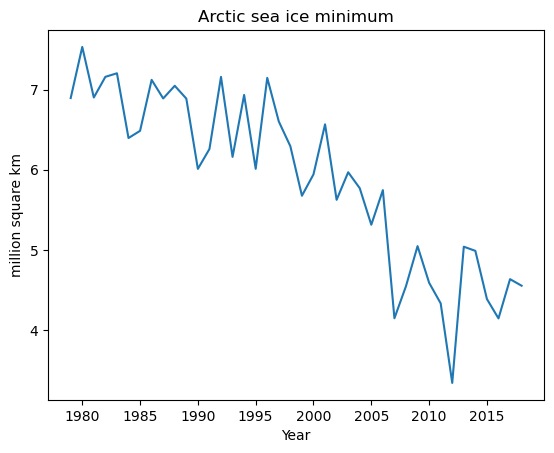

In [50]:
grouped = df.groupby(['hemisphere', 'Year'])
ice_extent = grouped['Extent'].min()['north']
ice_extent = ice_extent[1:-1]  # remove first and last years

my_plot = ice_extent.plot(title='Arctic sea ice minimum', ylabel='million square km')
my_plot.get_figure().savefig("figures/040_2.jpeg")

Notice how the sea ice minimum fluctuates seemingly at random from year to year. This kind of unexplained variation in data is often referred to as noise. But ignoring the fluctuations, we can see that there also appears to be a downward trend in the sea ice minimum. If we want to be sure that there is a genuine downward trend and that the low values in recent years are not just part of the usual random fluctuations, then we need to do some statistical analysis. We will look at how to do this later in the module.

## 5 Dealing with Missing Data

Very often we need to work with data sets that have 'missing values', i.e., for one or more fields in the data there is no value available. These are typically encoded in the data file using a special symbol such as 'NaN'. For example, we may have some employee data that records an ID, a surname and age and a gender, but there may be some employees that have not provided either their age or gender or both.

We can read and display some example data

In [51]:
df = pd.read_csv('data/employee.csv')

Note, below, the presence of 'NaN' in the age and gender columns.

In [52]:
print(df)

   ID    Surname   Age  Gender
0   1      Smith  32.0    Male
1   2    Johnson  45.0  Female
2   3   Gonzalez   NaN     NaN
3   4         Li  37.0  Female
4   5      Brown  41.0    Male
5   6  Rodriguez  29.0  Female
6   7      Kumar  32.0     NaN
7   8      Lopez  36.0  Female
8   9     Nguyen   NaN    Male
9  10      Patel  40.0    Male


There are some simple functions for testing for the presence of these missing values. For example, the `isnull()` method will produce a new dataframe of boolean values with a True in every location where data is missing.

In [53]:
print(pd.isnull(df))

      ID  Surname    Age  Gender
0  False    False  False   False
1  False    False  False   False
2  False    False   True    True
3  False    False  False   False
4  False    False  False   False
5  False    False  False   False
6  False    False  False    True
7  False    False  False   False
8  False    False   True   False
9  False    False  False   False


Typically if we have missing values we will need to take some action to deal with them before progressing with our analysis. Depending on the situation, the most appropriate action might be to simply remove the rows with missing values, or to fill in the missing values with some sensible default value, or to use some more sophisticated method for estimating what the missing values would have been if they had been present.

### 5.1 Filling missing data with a fixed value

We can fill in missing values using the `fillna` method. For example, if displaying the data, we may simply want to replace the Gender NaNs with something more readable such as 'Gender not provided'. This is done as follows,

In [54]:
df['Gender'].fillna("Gender not provided", inplace = True)

In [55]:
print(df)

   ID    Surname   Age               Gender
0   1      Smith  32.0                 Male
1   2    Johnson  45.0               Female
2   3   Gonzalez   NaN  Gender not provided
3   4         Li  37.0               Female
4   5      Brown  41.0                 Male
5   6  Rodriguez  29.0               Female
6   7      Kumar  32.0  Gender not provided
7   8      Lopez  36.0               Female
8   9     Nguyen   NaN                 Male
9  10      Patel  40.0                 Male


Note the parameter `inplace = True`. This tells Pandas to modify the DataFrame 'in place' rather than making and returning a modified copy of the original DataFrame (which is what happens when you set `inplace = False`, or use the default behaviour). This 'in place' modification is a common pattern in Pandas and many methods have this `inplace` parameter. For large DataFrames it is often desirable to modify the DataFrame in place to avoid the memory overhead of creating a new DataFrame. It can however be a dangerous style of programming that can lead to subtle errors. For example, if we have a function that modifies a DataFrame in place but which also returns the modified DataFrame then the user of the function may be unaware that the DataFrame they are passing as a parameter is going to be changed by the function. This unexpected behaviour can easily lead to bugs. It is often better to leave the `inplace` attribute set to False and to assign the result of the method to a new variable. This is a safer style of programming and should be preferred unless you are sure that it is causing a performance problem.

The `fillna` method has other useful options such as a `method` parameter that can fill the missing value with the previous or next valid observation in the Series. This behaviour is useful for sequential data, e.g., data ordered by date, for example. For example, if there is a weather station but it has failed to record a temperature on a particular day, then we might opt to fill in the missing value with the temperature recorded on the previous day as this is likely to be a reasonably good estimate.

### 5.2 Filling missing values using 'mean imputation'

Another common strategy for filling missing values in numeric data is to fill the missing values with the mean of the values that are present. In the data science literature this is known as 'mean imputation'. This might be a sensible way of treating our missing employee age data and can be easily done using,

In [56]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

This will produce the following,

In [57]:
print(df)

   ID    Surname   Age               Gender
0   1      Smith  32.0                 Male
1   2    Johnson  45.0               Female
2   3   Gonzalez  36.5  Gender not provided
3   4         Li  37.0               Female
4   5      Brown  41.0                 Male
5   6  Rodriguez  29.0               Female
6   7      Kumar  32.0  Gender not provided
7   8      Lopez  36.0               Female
8   9     Nguyen  36.5                 Male
9  10      Patel  40.0                 Male


Note how the missing age values for Gonzalez and Nguyen have now been replaced with 36.5.  Obviously, this is unlikely to be their true ages, but it might be a sensible guess to use in the analysis stages that are going to follow.

Treatment of missing data is a big topic and something we will return to later in the module.

## 6 Collating data

Very often as Data Scientists, we need to combine data from different sources. For example, we might have two separate datasets that are linked by a shared field, such as customer ID, date, or location. These will typically start lief as separate files. These can be read into two separate DataFrames but in order to understand the data we will generally need to combine these DataFrames into a new common DataFrame, in some way.

In the simple example below, we will consider two different sets of atmospheric gas readings, carbon dioxide and methane that have been measured at the same location over time but are stored separately in the files `co2.csv` and `ch4.csv`. (The file names are based on the chemical formulae for carbon dioxide and methane, CO<sub>2</sub> and CH<sub>4</sub>, respectively).

Let's imagine that the first few rows of these tables look like this

```csv
year, month, day, co2
2020, 1, 02, 442
2020, 1, 03, 444
2020, 1, 04, 441
2020, 1, 07, 446
```

and this,

```csv
year, month, day, ch4
2020, 1, 02, 442
2020, 1, 03, 444
2020, 1, 05, 441
2020, 1, 06, 442
2020, 1, 07, 446
```

We can see that for both tables share the same year, month and day columns but each have their own unique column for the gas concentration measurement. We can also see that the data is not recorded on every day: on some days there is both a carbon dioxide and a methane measurement, on some just one or the other and on some dates there is neither. We will now consider different ways in which these datasets can be combined.

### 6.1 Combining DataFrames using the `merge` method

To make the task a bit more instructive, the data above has some missing entries, e.g., entries for day 05 and 06 are missing from the CO<sub>2</sub> data. The entry for day 04 is missing from the CH<sub>4</sub> data. In a well designed dataset these might have been recorded with NaN values but often there are just gaps in the data.

We can read these tables using,

In [58]:
co2_df = pd.read_csv('data/co2_ex.csv', skipinitialspace=True)
ch4_df = pd.read_csv('data/ch4_ex.csv',  skipinitialspace=True)

In [59]:
print(co2_df)
print(ch4_df)

   year  month  day  co2
0  2020      1    2  442
1  2020      1    3  444
2  2020      1    4  441
3  2020      1    7  446
   year  month  day  ch4
0  2020      1    2  442
1  2020      1    3  444
2  2020      1    5  441
3  2020      1    6  442
4  2020      1    7  446


We can now `merge` the tables. To do this we need to pick a column to **merge on**. This is typically a key-like value that uniquely identifies the data entry (i.e., row) and which appears in both tables. If no one column is unique then we can use a collection of columns to merge on. For example, in our data, neither the year, month nor day would be a unique identifier if taken in isolation, but the three together form a unique set of values (i.e., because there is only one measurement per day, no two rows have an identical year, month and day). So we will use `on=['year', 'month', 'day']`.

We can then merge in four different ways: `inner`, `outer`, `left` or `right`. These differ in how they treat missing values: `inner` will only merge rows in which the row exists in both DataFrames (i.e., if you think of this a merging two *sets* then this would be an 'intersection'); `outer` will include rows that exist in either of the two DataFrames (i.e., in terms of sets, this would be a 'union'); `left` only includes rows which are in the first DataFrame and `right` only those in the second. This can be most easily understood by comparing the outputs below.

* Merging CO<sub>2</sub> and CH<sub>4</sub> using an `inner` merge:

In [60]:
combined_df = co2_df.merge(ch4_df, on=['year', 'month', 'day'], how='inner')
print(combined_df)

   year  month  day  co2  ch4
0  2020      1    2  442  442
1  2020      1    3  444  444
2  2020      1    7  446  446


* Merging CO<sub>2</sub> and CH<sub>4</sub> using an `outer` merge:

In [61]:
combined_df = co2_df.merge(ch4_df, on=['year', 'month', 'day'], how='outer')
print(combined_df)

   year  month  day    co2    ch4
0  2020      1    2  442.0  442.0
1  2020      1    3  444.0  444.0
2  2020      1    4  441.0    NaN
3  2020      1    7  446.0  446.0
4  2020      1    5    NaN  441.0
5  2020      1    6    NaN  442.0


* Merging CO<sub>2</sub> and CH<sub>4</sub> using a `left` merge:

In [62]:
combined_df = co2_df.merge(ch4_df, on=['year', 'month', 'day'], how='left')
print(combined_df)

   year  month  day  co2    ch4
0  2020      1    2  442  442.0
1  2020      1    3  444  444.0
2  2020      1    4  441    NaN
3  2020      1    7  446  446.0


* Merging CO<sub>2</sub> and CH<sub>4</sub> using a `right` merge:

In [63]:
combined_df = co2_df.merge(ch4_df, on=['year', 'month', 'day'], how='right')
print(combined_df)

   year  month  day    co2  ch4
0  2020      1    2  442.0  442
1  2020      1    3  444.0  444
2  2020      1    5    NaN  441
3  2020      1    6    NaN  442
4  2020      1    7  446.0  446


In all cases, in the resulting table, any missing values will be automatically filled in with NaNs.

Warning:

Typically the join columns act as a unique key. What happens if we choose columns that are not unique? Below we attempt to join on the 'year' column which is actually the same for all our rows, i.e.,

In [64]:
combined_df = co2_df.merge(ch4_df, on=['year'], how='inner')
print(combined_df)

    year  month_x  day_x  co2  month_y  day_y  ch4
0   2020        1      2  442        1      2  442
1   2020        1      2  442        1      3  444
2   2020        1      2  442        1      5  441
3   2020        1      2  442        1      6  442
4   2020        1      2  442        1      7  446
5   2020        1      3  444        1      2  442
6   2020        1      3  444        1      3  444
7   2020        1      3  444        1      5  441
8   2020        1      3  444        1      6  442
9   2020        1      3  444        1      7  446
10  2020        1      4  441        1      2  442
11  2020        1      4  441        1      3  444
12  2020        1      4  441        1      5  441
13  2020        1      4  441        1      6  442
14  2020        1      4  441        1      7  446
15  2020        1      7  446        1      2  442
16  2020        1      7  446        1      3  444
17  2020        1      7  446        1      5  441
18  2020        1      7  446  

This has taken the set of rows from each table that share the same year, and made new rows using every possible pairing of rows in these sets. Also because 'month' and 'day' were not in the join the new DataFrame now has a separate month and day columns coming from the two original DataFrames which have been automatically distinguished with the suffixes '_x' and '_y'.  There are actually instances when we might want this behaviour, but if your output is looking like this, it is more likely that it's because you have set the `on` parameter incorrectly.

### 6.2 Combining DataFrames using the `join` method

The `join` function is very similar to `merge` except that it uses the DataFrame's index to decide which rows to combine. It can be thought of as a special case of `merge`, however, it is often more convenient and faster to use. If the DataFrame already has a meaningful index then this is very easy to use, e.g., perhaps a product ID column is being used as the index and we have two DataFrames containing product sales for different product ranges that we wish to join.

In our case, if working with the CO<sub>2</sub> and CH<sub>4</sub> data from above, in order to use join we would first need to make an index using the year, month and day columns. We can do this using the `set_index` method, like so:

In [65]:
co2_df_indexed = co2_df.set_index(['year', 'month', 'day'])
ch4_df_indexed = ch4_df.set_index(['year', 'month', 'day'])

In [66]:
print(co2_df_indexed)
print(ch4_df_indexed)

                co2
year month day     
2020 1     2    442
           3    444
           4    441
           7    446
                ch4
year month day     
2020 1     2    442
           3    444
           5    441
           6    442
           7    446


We can now perform the join. Again, as with merge, we can join using `inner`, `outer`, `left` or `right`.

In [67]:
combined_df = co2_df_indexed.join(ch4_df_indexed, how='outer')
print(combined_df)

                  co2    ch4
year month day              
2020 1     2    442.0  442.0
           3    444.0  444.0
           4    441.0    NaN
           5      NaN  441.0
           6      NaN  442.0
           7    446.0  446.0


Comparing `merge` and `join`, `merge` is more versatile because it can merge on any column, whereas join can only merge on the index. So you might wonder why have a `join` method at all? The answer is that the `join` method works internally in a very different way than `merge` that exploits special properties of the DataFrame index. For large DataFrames, `join` is generally much faster than `merge` and so should be preferred if its use is possible.

## Summary

Pandas is a large and sophisticated package for working with data. In this tutorial we have used it to read data, to deal with missing values, to conditionally filter data, to compute statistic on fields with and without prior grouping, to combine datasets using merge and join. This is a good overview of the most commonly used functionality but only scratches the surface of what Pandas can do. There are entire books dedicated to Pandas and extensive documentation available online: it is a very useful tool to have in your toolbox. We will be using it throughout the rest of the module and will introduce new functionality as required.